<a href="https://colab.research.google.com/github/anas1IA/TP_DEEP_Learning/blob/main/Project_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data ="winequality-red.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Set the hyperparameters for data creation
NUM_CLASSES = 5
NUM_FEATURES = 11
RANDOM_SEED = 42

In [6]:
X_data,y_data = df.drop(columns=["quality"]),df["quality"]

In [7]:
# X_data[:5],y_data[:5]
X_data_tensor = torch.tensor(X_data.values).float()
y_data_tensor = torch.tensor(y_data.values).long()
print(X_data_tensor[:5], y_data_tensor[:5])

tensor([[7.4000e+00, 7.0000e-01, 0.0000e+00, 1.9000e+00, 7.6000e-02, 1.1000e+01,
         3.4000e+01, 9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00],
        [7.8000e+00, 8.8000e-01, 0.0000e+00, 2.6000e+00, 9.8000e-02, 2.5000e+01,
         6.7000e+01, 9.9680e-01, 3.2000e+00, 6.8000e-01, 9.8000e+00],
        [7.8000e+00, 7.6000e-01, 4.0000e-02, 2.3000e+00, 9.2000e-02, 1.5000e+01,
         5.4000e+01, 9.9700e-01, 3.2600e+00, 6.5000e-01, 9.8000e+00],
        [1.1200e+01, 2.8000e-01, 5.6000e-01, 1.9000e+00, 7.5000e-02, 1.7000e+01,
         6.0000e+01, 9.9800e-01, 3.1600e+00, 5.8000e-01, 9.8000e+00],
        [7.4000e+00, 7.0000e-01, 0.0000e+00, 1.9000e+00, 7.6000e-02, 1.1000e+01,
         3.4000e+01, 9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00]]) tensor([5, 5, 5, 6, 5])


In [8]:
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data_tensor,
    y_data_tensor,
    test_size=0.2,
    random_state=RANDOM_SEED)

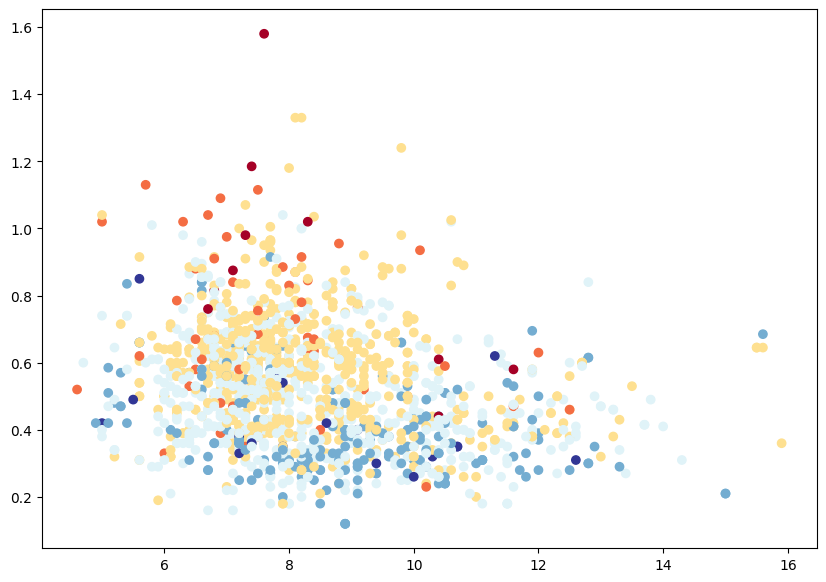

In [9]:
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_data_tensor[:, 0], X_data_tensor[:, 1], c=y_data_tensor, cmap=plt.cm.RdYlBu);

In [10]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [11]:




# # 1. Create multi-class data
# X_blob, y_blob = make_blobs(n_samples=1000,
#     n_features=NUM_FEATURES, # X features
#     centers=NUM_CLASSES, # y labels
#     cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
#     random_state=RANDOM_SEED
# )

# # 2. Turn data into tensors
# X_blob = torch.from_numpy(X_blob).type(torch.float)
# y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
# print(X_blob[:5], y_blob[:5])

# # 3. Split into train and test sets
# X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
#     y_blob,
#     test_size=0.2,
#     random_state=RANDOM_SEED
# )

# # 4. Plot data
# plt.figure(figsize=(10, 7))
# plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [12]:
# # Create device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"
# device

In [13]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
             nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=28).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=11, out_features=28, bias=True)
    (1): ReLU()
    (2): Linear(in_features=28, out_features=28, bias=True)
    (3): ReLU()
    (4): Linear(in_features=28, out_features=5, bias=True)
  )
)

In [14]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance`

In [15]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_data_train.to(device))[:5]

tensor([[-0.5860,  0.0114,  2.9161,  1.6034,  4.2062],
        [-0.1231,  0.8440,  5.6512,  3.4012,  8.9007],
        [-0.8370, -0.0524,  0.8043,  0.4116,  0.9295],
        [-1.0965, -0.1324,  0.6339,  0.5833,  0.8312],
        [-0.5548, -0.0268,  2.5178,  0.8098,  3.2625]],
       grad_fn=<SliceBackward0>)

In [16]:
# How many elements in a single prediction sample?
model_4(X_data_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([5]), 5)

In [17]:
# Make prediction logits with model
y_logits = model_4(X_data_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.6702, -0.0159,  1.7213,  0.8892,  2.3824],
        [-0.3575,  0.5958,  3.9808,  2.0643,  5.8850],
        [-1.0260, -0.1672,  1.2260,  0.8628,  1.5706],
        [-0.9405, -0.2275,  1.4602,  1.3941,  2.1131],
        [-0.8888, -0.1675,  0.8756,  0.7775,  1.2988]],
       grad_fn=<SliceBackward0>)
tensor([[0.0251, 0.0484, 0.2748, 0.1196, 0.5322],
        [0.0017, 0.0043, 0.1265, 0.0186, 0.8490],
        [0.0304, 0.0718, 0.2890, 0.2010, 0.4079],
        [0.0219, 0.0448, 0.2420, 0.2265, 0.4648],
        [0.0433, 0.0890, 0.2527, 0.2291, 0.3858]], grad_fn=<SliceBackward0>)


In [18]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [19]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.0251, 0.0484, 0.2748, 0.1196, 0.5322], grad_fn=<SelectBackward0>)
tensor(4)


In [20]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [25]:
# Fit the model
#torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_data_train, y_data_train = X_data_train.to(device), y_data_train.to(device)
X_data_test, y_data_test = X_data_test.to(device), y_data_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_data_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    print(y_pred)
    print(y_data_train)
    # 2. Calculate loss and accuracy
    loss = loss_fn( y_pred, y_data_train)
    #acc = accuracy_fn(y_true=y_data_train,y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_data_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_data_test)
      test_acc = accuracy_fn(y_true=y_data_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

tensor([4, 4, 4,  ..., 4, 4, 4])
tensor([6, 6, 6,  ..., 5, 7, 6])


RuntimeError: Expected floating point type for target with class probabilities, got Long